# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taiohae
City not found. Skipping...
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | west island
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | papatowai
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | musay'id
City not found. Skipping...
Processing Record 9 of Set 1 | sanawad
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | susuman
Processing Record 13 of Set 1 | cabo san lucas
Processing Record 14 of Set 1 | udachny
Processing Record 15 of Set 1 | port elizabeth
Processing Record 16 of Set 1 | avarua
Processing Record 17 of Set 1 | matias barbosa
Processing Record 18 of Set 1 | sitka
Processing Record 19 of Set 1 | ribeira grande
Processing Record 20 of Set 1 | crane
Processing Record 21 of Set

Processing Record 37 of Set 4 | surovikino
Processing Record 38 of Set 4 | morondava
Processing Record 39 of Set 4 | port saint john's
Processing Record 40 of Set 4 | castanos
Processing Record 41 of Set 4 | sand springs
Processing Record 42 of Set 4 | ibirite
Processing Record 43 of Set 4 | seka
Processing Record 44 of Set 4 | iquique
Processing Record 45 of Set 4 | axim
Processing Record 46 of Set 4 | sittwe
Processing Record 47 of Set 4 | ntcheu
Processing Record 48 of Set 4 | lebu
Processing Record 49 of Set 4 | enewetak
Processing Record 0 of Set 5 | callao
Processing Record 1 of Set 5 | nogliki
Processing Record 2 of Set 5 | aasiaat
Processing Record 3 of Set 5 | chamalieres
Processing Record 4 of Set 5 | zaragoza
Processing Record 5 of Set 5 | acarau
Processing Record 6 of Set 5 | santa vitoria
Processing Record 7 of Set 5 | taulaga
Processing Record 8 of Set 5 | puerto san carlos
City not found. Skipping...
Processing Record 9 of Set 5 | petropavlovsk-kamchatsky
Processing Reco

City not found. Skipping...
Processing Record 29 of Set 8 | silver city
Processing Record 30 of Set 8 | missoula
Processing Record 31 of Set 8 | ponta delgada
Processing Record 32 of Set 8 | acapulco de juarez
Processing Record 33 of Set 8 | xai-xai
Processing Record 34 of Set 8 | st. thomas
Processing Record 35 of Set 8 | urucui
Processing Record 36 of Set 8 | dordrecht
Processing Record 37 of Set 8 | chicxulub puerto
City not found. Skipping...
Processing Record 38 of Set 8 | tharangambadi
Processing Record 39 of Set 8 | olonkinbyen
Processing Record 40 of Set 8 | miahuatlan de porfirio diaz
Processing Record 41 of Set 8 | coruripe
Processing Record 42 of Set 8 | yeed
Processing Record 43 of Set 8 | ambon
Processing Record 44 of Set 8 | pandatarai
City not found. Skipping...
Processing Record 45 of Set 8 | suva
Processing Record 46 of Set 8 | kataragama
City not found. Skipping...
Processing Record 47 of Set 8 | laguna
Processing Record 48 of Set 8 | centenario
Processing Record 49 o

Processing Record 17 of Set 12 | bela
Processing Record 18 of Set 12 | hayma'
City not found. Skipping...
Processing Record 19 of Set 12 | moyamba
Processing Record 20 of Set 12 | kaspiyskiy
Processing Record 21 of Set 12 | plastun
Processing Record 22 of Set 12 | kolosovka
Processing Record 23 of Set 12 | cole harbour
Processing Record 24 of Set 12 | sechura
Processing Record 25 of Set 12 | freetown
Processing Record 26 of Set 12 | ierapetra
Processing Record 27 of Set 12 | archangelos
Processing Record 28 of Set 12 | coahuayana de hidalgo
Processing Record 29 of Set 12 | saint-philippe
Processing Record 30 of Set 12 | malysheva
Processing Record 31 of Set 12 | bria
Processing Record 32 of Set 12 | san jose village
City not found. Skipping...
Processing Record 33 of Set 12 | aki
Processing Record 34 of Set 12 | utiel
Processing Record 35 of Set 12 | pasuquin
Processing Record 36 of Set 12 | walvis bay
Processing Record 37 of Set 12 | feijo
Processing Record 38 of Set 12 | vryheid
Proc

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,14.88,56,17,1.34,US,1697234156
1,west island,-12.1568,96.8225,24.99,83,75,6.17,CC,1697234184
2,yellowknife,62.4560,-114.3525,11.90,91,40,6.71,CA,1697234184
3,waitangi,-43.9535,-176.5597,12.27,89,23,14.26,NZ,1697234184
4,papatowai,-46.5619,169.4708,11.72,69,80,1.73,NZ,1697234184


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,14.88,56,17,1.34,US,1697234156
1,west island,-12.1568,96.8225,24.99,83,75,6.17,CC,1697234184
2,yellowknife,62.4560,-114.3525,11.90,91,40,6.71,CA,1697234184
3,waitangi,-43.9535,-176.5597,12.27,89,23,14.26,NZ,1697234184
4,papatowai,-46.5619,169.4708,11.72,69,80,1.73,NZ,1697234184


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

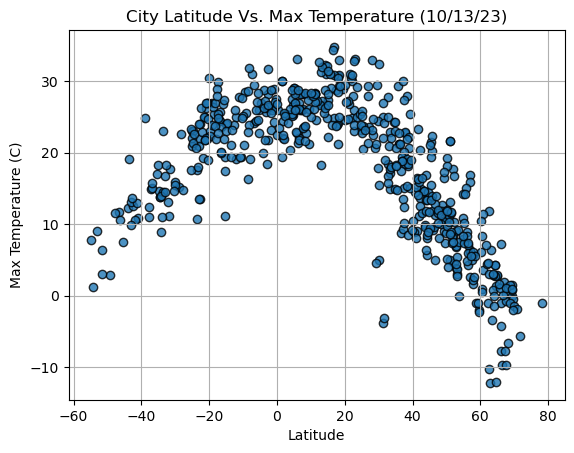

In [8]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Max Temp"]
plt.scatter(x_axis, y_axis,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

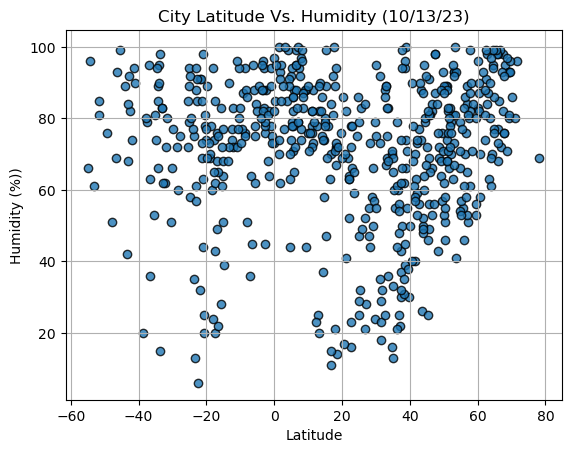

In [9]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Humidity"]
plt.scatter(x_axis, y_axis,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%))")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

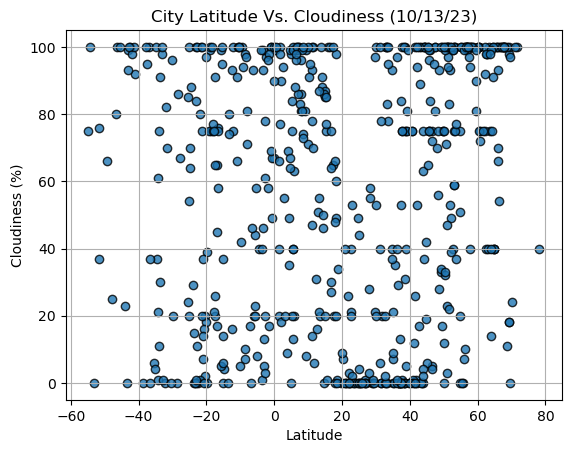

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Cloudiness"]
plt.scatter(x_axis, y_axis,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

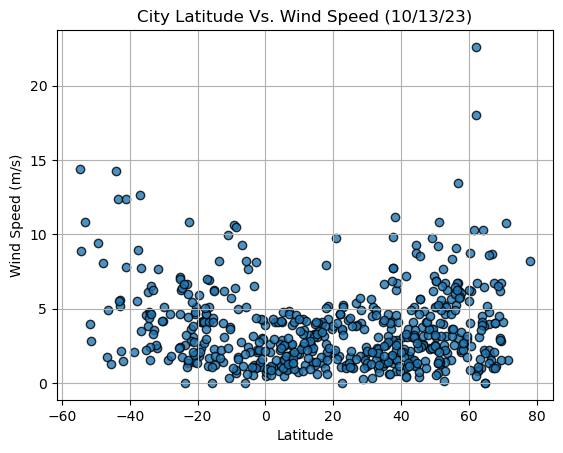

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Wind Speed"]
plt.scatter(x_axis, y_axis,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_reg(x_values,y_values,title,text_coordinates):
    
    # Run regression on Southern Hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Title")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,14.88,56,17,1.34,US,1697234156
2,yellowknife,62.4560,-114.3525,11.90,91,40,6.71,CA,1697234184
6,sanawad,22.1833,76.0667,24.87,52,3,1.10,IN,1697234185
9,susuman,62.7833,148.1667,-12.23,84,98,0.89,RU,1697234185
10,cabo san lucas,22.8909,-109.9124,33.12,66,2,5.23,MX,1697234175


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,west island,-12.1568,96.8225,24.99,83,75,6.17,CC,1697234184
3,waitangi,-43.9535,-176.5597,12.27,89,23,14.26,NZ,1697234184
4,papatowai,-46.5619,169.4708,11.72,69,80,1.73,NZ,1697234184
5,adamstown,-25.0660,-130.1015,20.99,79,100,7.16,PN,1697234184
7,edinburgh of the seven seas,-37.0676,-12.3116,14.93,95,100,12.62,SH,1697234185


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8566917905375524


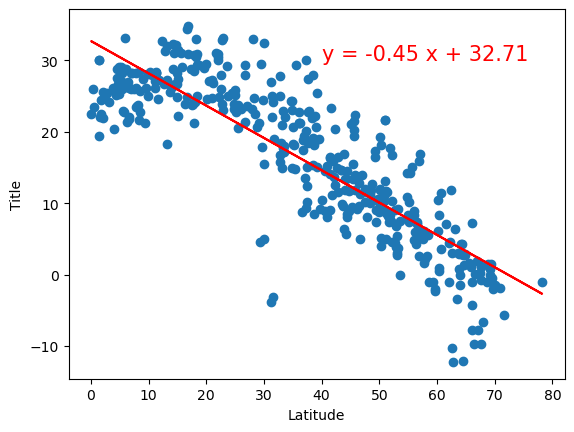

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plot_linear_reg(x_values,y_values, 'Max Temp', (40,30))

The r-squared is: 0.7994723008688702


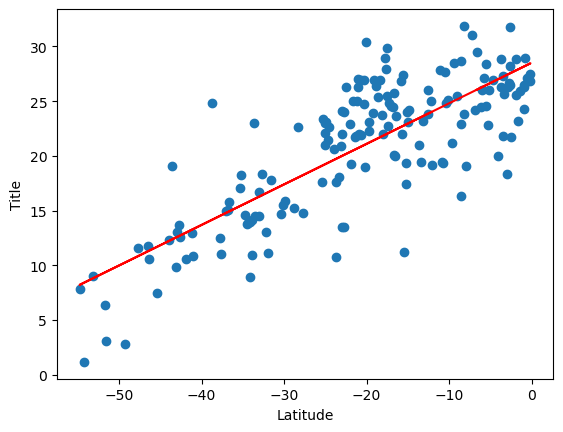

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plot_linear_reg(x_values,y_values, 'Max Temp', (-50, 35))

**Discussion about the linear relationship:** With the northern hemisphere in the autumn season and the southern hemisphere in their spring season, the warmest parts of the world are those closest to the equator in both hemispheres as shown above.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.06388542668112153


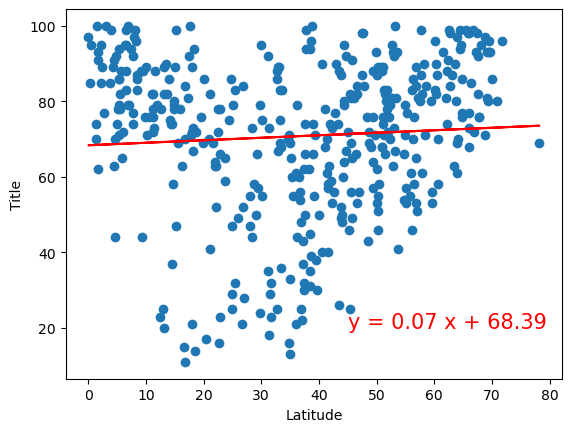

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_reg(x_values,y_values, 'Humidity', (45, 20))

The r-squared is: 0.040499779131932624


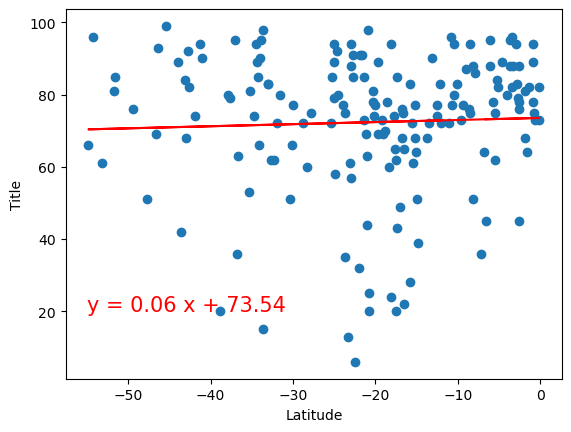

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plot_linear_reg(x_values,y_values, 'Humidity', (-55, 20))

**Discussion about the linear relationship:** Most of the given cities seem to be humid on this day. In the northern hemisphere, cities away from the equator are slightly more humid. In the southern hemisphere the opposite is true, as cities closer to the equator are more humid than those further away.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.1677437341287862


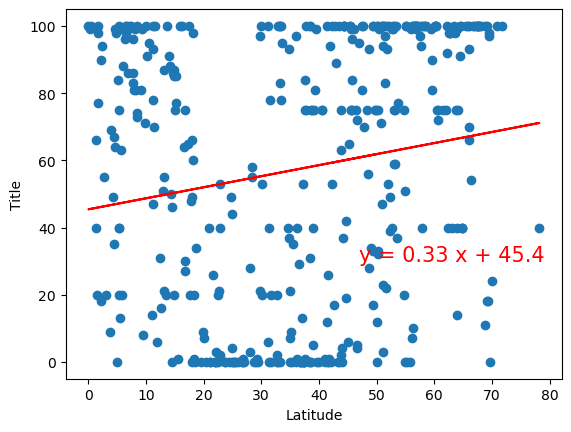

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plot_linear_reg(x_values,y_values, 'Cloudiness', (47, 30))

The r-squared is: -0.02386909657825246


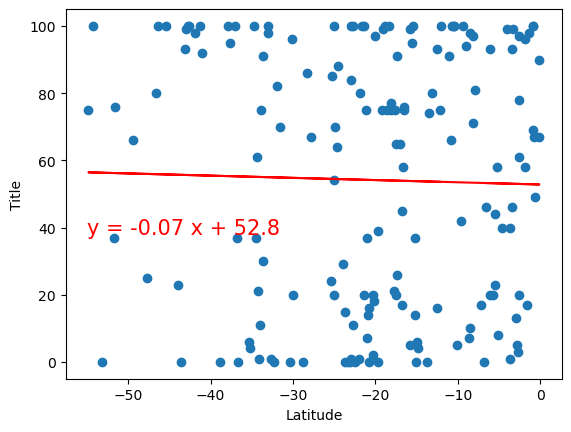

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plot_linear_reg(x_values,y_values, 'Cloudiness', (-55, 38))

**Discussion about the linear relationship:** While cloudiness does not necessarily have direct correlation with location or temperatures, the northern cities in the northern hemisphere have more cloud coverage on this day. In the southern hemisphere, the data indicates scattered cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.2975785347450648


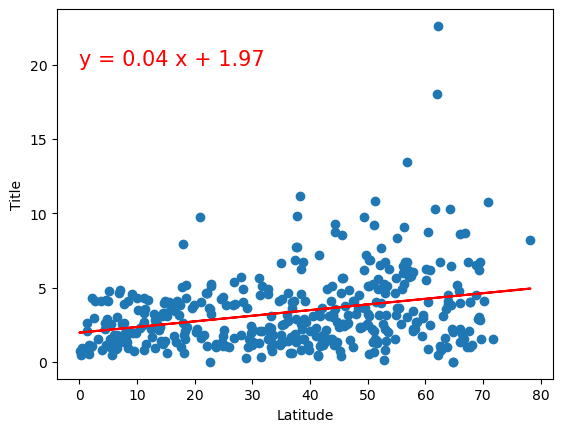

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
plot_linear_reg(x_values,y_values, 'Wind Speed', (0, 20))

The r-squared is: -0.37229271583744505


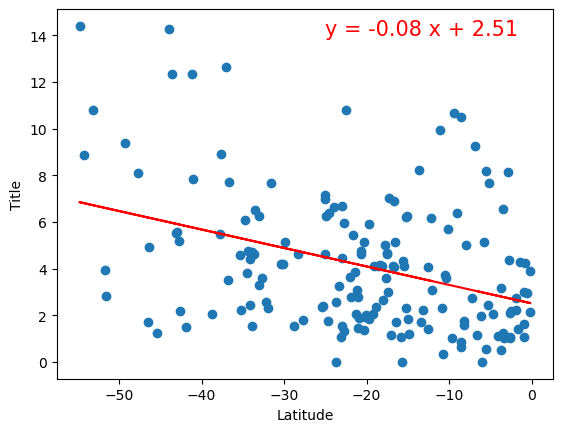

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
plot_linear_reg(x_values,y_values, 'Wind Speed', (-25, 14))

**Discussion about the linear relationship:** Wind Speeds remained relatively low in most places around the world as seen in both charts above, with outliers in the most northern and most southern given cities.